Populating the interactive namespace from numpy and matplotlib


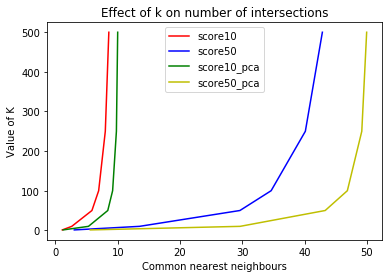

In [15]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.decomposition import PCA
%pylab inline
import matplotlib.pyplot as plt

def convert(imgf, n):
    f = open(imgf, "rb")

    f.read(16)
    images = []

    for i in range(n):
        image=[]
        for j in range(28*28):
            image.append(ord(f.read(1))) 
        images.append(image)
    df=pd.DataFrame(images)
    f.close()
    return df

def Neighbours(n,X):
    nbrs = NearestNeighbors(n_neighbors=n, algorithm='ball_tree',metric='euclidean').fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances, indices

def Intersection(array1, array2):
    Intersection = np.empty([ array1.shape[0]])
    for i in range(0, array1.shape[0]):
        Intersection[i] = len( set(array1[i]).intersection(array2[i]) )
    return Intersection
    
def DifferentK_random(k):
    R=np.random.randn(k, 784)
    R=pd.DataFrame(R)
    Xnew=R.dot(X)
    Xnew=pd.DataFrame(Xnew)
    distances10_new, indices10_new=Neighbours(10,Xnew.T)
    distances50_new, indices50_new=Neighbours(50,Xnew.T)
    intersect10=Intersection(indices10,indices10_new)
    intersect50=Intersection(indices50,indices50_new)
    score10=intersect10.sum()/n
    score50=intersect50.sum()/n
    return score10,score50
    
def DifferentK_PCA(k):
    pca = PCA(n_components=k)
    Xnew=pca.fit_transform(X.T, y=None)
    Xnew=pd.DataFrame(Xnew)
    distances10_new, indices10_new=Neighbours(10,Xnew)
    distances50_new, indices50_new=Neighbours(50,Xnew)
    intersect10=Intersection(indices10,indices10_new)
    intersect50=Intersection(indices50,indices50_new)
    score10=intersect10.sum()/n
    score50=intersect50.sum()/n
    return score10,score50

df=convert("t10k-images.idx3-ubyte", 10000)
df=(df.T)
n=2000
X=df.iloc[:,0:n]
distances10, indices10=Neighbours(10,X.T)
distances50, indices50=Neighbours(50,X.T)
k=[1,10,50,100,250,500]
score10=[]
score50=[]
score10_pca=[]
score50_pca=[]
for i in k:
    x,y=DifferentK_random(i)
    score10.append(x)
    score50.append(y)
for i in k:
    x,y=DifferentK_PCA(i)
    score10_pca.append(x)
    score50_pca.append(y)    

plot(score10, k, 'r',label='score10')
plot(score50, k, 'b',label='score50')
plot(score10_pca, k, 'g',label='score10_pca')
plot(score50_pca, k, 'y',label='score50_pca')

xlabel('Common nearest neighbours')
ylabel('Value of K')
title('Effect of k on number of intersections')

legend(loc=0)